#### Written by Gabriel Borges Pinheiro
[Github](github.com/gabrielbopi)

Simulation made like as the figure 1.9 at [DOI: 10.1561/2000000093](https://massivemimobook.com/wp/free-pdf/).

In [10]:
import numpy as np
import scipy.special as sc
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def db(X):
    return 10 * np.log10(X)

In [5]:
def inv_db(x):
    return 10**(x/10)

In [6]:
n_sample = 100
precision_base = 1.045
min_ = -10; max_ = 30
SNRmin = inv_db(min_)
SNRmax = inv_db(max_); 

In [8]:
beta = inv_db(np.array([-30, -10]))
SNR0_db = np.linspace(min_, max_, num=n_sample)
SNR0 = inv_db(SNR0_db)

SNR0_inv = 1/SNR0

/home/gabriel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys
/home/gabriel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


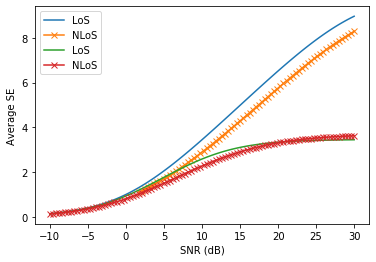

In [11]:
for b in beta:#beta = {-30db,-10db}
    SNR0_invb = SNR0_inv/b
    #SE0LoS:
    SE0LoS = np.log2(1+1/(b+SNR0_inv))

    #SE0NLoS:
    SE0NLoS = (np.exp(SNR0_inv)*sc.expn(1, SNR0_inv) - np.exp(SNR0_invb)*sc.expn(1, SNR0_invb))/(np.log(2)*(1-b))

    #Plot
    plt.xlabel('SNR (dB)')
    plt.plot(SNR0_db, SE0LoS, label = 'LoS')
    plt.plot(SNR0_db,SE0NLoS, label = 'NLoS', marker = 'x')
    plt.ylabel('Average SE')
plt.legend()